# Stellar Association Properties

In [1]:
# imports
from astropy.io import ascii
from astropy import units as u

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import re
import pyperclip

### Retrieve Data

In [2]:
# table 1
table1 = pd.read_table("gagne2018Table1.dat",index_col = False)
table1

,Asso.,N,$\mathrm{ln}{\alpha }_{k}$ ^b,Unnamed: 3,Unnamed: 4,Unnamed: 5,$\langle \varpi \rangle $ ^c,$\langle \nu \rangle $ ^d,S_spa^e,S_kin^f,Age,Age.1,Unnamed: 12
0,118TAU,10,-17.22,-18.60,-21.37,-22.66,100 +or- 10,14 +or- 2,3.4,2.1,~10,1,NaN
1,ABDMG,48,-14.11,-15.39,-16.56,-17.60,${30}_{-10}^{+20}$,${10}_{-20}^{+10}$,19.0,1.4,${149}_{-19}^{+51}$,2,NaN
2,betaPMG,42,-13.57,-14.77,-17.39,-18.24,${30}_{-10}^{+20}$,10 +or- 10,14.8,1.4,24 +or- 3,2,NaN
3,CAR,7,-13.41,-14.82,-18.45,-19.15,60 +or- 20,20 +or- 2,11.8,0.8,${45}_{-7}^{+11}$,2,NaN
4,CARN,13,-15.51,-16.85,-17.64,-18.55,30 +or- 20,${15}_{-10}^{+7}$,14.0,2.1,~200,3,NaN
5,CBER,40,-13.70,-15.09,-22.32,-23.43,${85}_{-5}^{+4}$,-0.1 +or- 0.8,3.6,0.5,${562}_{-84}^{+98}$,4,NaN
6,COL,23,-13.08,-14.10,-17.74,-18.34,50 +or- 20,${21}_{-8}^{+3}$,15.8,0.9,${42}_{-4}^{+6}$,2,NaN
7,CRA,12,-17.55,-19.07,-21.89,-22.89,139 +or- 4,-1 +or- 1,1.5,1.7,4-5,5,NaN
8,EPSC,25,-17.47,-18.59,-22.38,-22.79,102 +or- 4,14 +or- 3,2.8,1.8,${3.7}_{-1.4}^{+4.6}$,6,NaN
9,ETAC,16,-20.19,-21.36,-25.75,-26.22,95 +or- 1,20 +or- 3,0.6,2.0,11 +or- 3,2,NaN


In [3]:
# table 9
table9 = pd.read_table("gagne2018Table9.dat",index_col = False)
table9

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55
0,118TAU,-102.30,-4.80,-9.90,-12.80,-19.10,-9.20,12.70,2.40,1.80,2.10,2.80,1.60
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,1.40,1.00,1.80
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,2.20,1.20,1.00
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,0.67,1.02,1.01
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,3.20,1.90,2.00
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,0.53,0.44,0.71
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,1.04,1.29,0.75
7,CRA,132.45,-0.21,-42.43,-3.70,-15.70,-8.80,3.71,0.75,2.04,1.30,2.20,2.20
8,EPSC,49.90,-84.80,-25.60,-9.90,-19.30,-9.70,2.50,3.60,4.00,1.60,2.20,2.00
9,ETAC,33.65,-81.36,-34.81,-10.00,-22.30,-11.70,0.65,0.98,0.71,1.60,2.80,1.80


In [4]:
table1['Age']

0                       ~10
1       ${149}_{-19}^{+51}$
2                 24 +or- 3
3         ${45}_{-7}^{+11}$
4                      ~200
5       ${562}_{-84}^{+98}$
6          ${42}_{-4}^{+6}$
7                       4-5
8     ${3.7}_{-1.4}^{+4.6}$
9                 11 +or- 3
10             750 +or- 100
11                50 +or- 5
12         ${46}_{-5}^{+6}$
13                15 +or- 3
14                35 +or- 5
15                      ~60
16               112 +or- 5
17                      < 2
18                      1-2
19                45 +or- 4
20         ${22}_{-3}^{+4}$
21                10 +or- 3
22                16 +or- 2
23                      ~10
24              414 +or- 23
25                10 +or- 3
26                     ~500
Name: Age, dtype: object

In [5]:
#reformat age
plus_loc = np.array([age.find('+') for age in table1['Age']])
plus_loc[plus_loc == -1] = 100
print(plus_loc)

sub_loc = np.array([age.find('_') for age in table1['Age']])
sub_loc[sub_loc == -1] = 100
print(sub_loc)

error_loc = np.min([plus_loc,sub_loc],axis = 0)
print(error_loc)

[100  14   3  12 100  14  12 100  15   3   4   3  12   3   3 100   4 100
 100   3  12   3   3 100   4   3 100]
[100   6 100   5 100   6   5 100   6 100 100 100   5 100 100 100 100 100
 100 100   5 100 100 100 100 100 100]
[100   6   3   5 100   6   5 100   6   3   4   3   5   3   3 100   4 100
 100   3   5   3   3 100   4   3 100]


In [6]:
#extract ages from table 1
ages = [age[:error_loc[i]] for i,age in enumerate(table1['Age'])]
print(ages)

ages = [int(re.findall(r'\d+', age)[0]) for age in ages]
ages[8] = 4.5
ages[9] = 3.7
print(ages)

['~10', '${149}', '24 ', '${45}', '~200', '${562}', '${42}', '4-5', '${3.7}', '11 ', '750 ', '50 ', '${46}', '15 ', '35 ', '~60', '112 ', '< 2', '1-2', '45 ', '${22}', '10 ', '16 ', '~10', '414 ', '10 ', '~500']
[10, 149, 24, 45, 200, 562, 42, 4, 4.5, 3.7, 750, 50, 46, 15, 35, 60, 112, 2, 1, 45, 22, 10, 16, 10, 414, 10, 500]


In [7]:
# get distances
distances = np.sqrt(table9['X']**2 + table9['Y']**2 + table9['Z']**2)

In [8]:
#put relevant info into one table
data = table9
data['age'] = ages
data['distance'] = distances
data['N'] = table1['N']
data

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55,age,distance,N
0,118TAU,-102.30,-4.80,-9.90,-12.80,-19.10,-9.20,12.70,2.40,1.80,2.10,2.80,1.60,10.0,102.889941,10
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,1.40,1.00,1.80,149.0,12.856127,48
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,2.20,1.20,1.00,24.0,17.555341,42
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,0.67,1.02,1.01,45.0,53.248380,7
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,3.20,1.90,2.00,200.0,28.435717,13
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,0.53,0.44,0.71,562.0,85.264412,40
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,1.04,1.29,0.75,42.0,42.421457,23
7,CRA,132.45,-0.21,-42.43,-3.70,-15.70,-8.80,3.71,0.75,2.04,1.30,2.20,2.20,4.0,139.080378,12
8,EPSC,49.90,-84.80,-25.60,-9.90,-19.30,-9.70,2.50,3.60,4.00,1.60,2.20,2.00,4.5,101.668137,25
9,ETAC,33.65,-81.36,-34.81,-10.00,-22.30,-11.70,0.65,0.98,0.71,1.60,2.80,1.80,3.7,94.675806,16


### display data

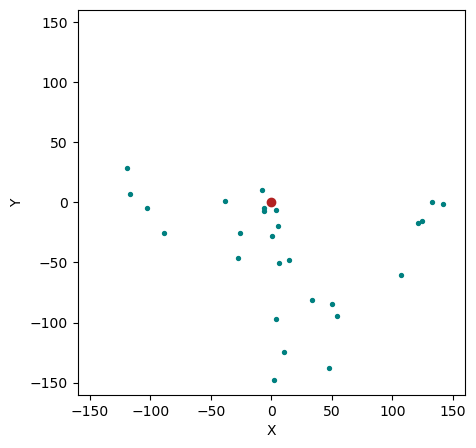

In [9]:
# display locations
plt.figure(figsize=(5,5))
plt.xlim([-160,160])
plt.xlabel('X')

plt.ylim([-160,160])
plt.ylabel('Y')

plt.scatter(0,0,color='firebrick')
plt.scatter(data['X'], data['Y'], color = 'teal', s=8)

plt.show()

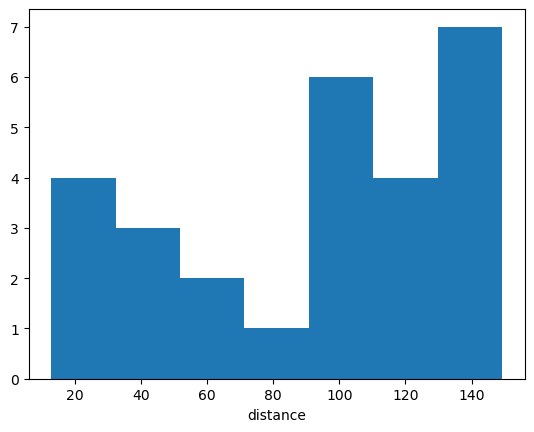

In [10]:
plt.hist(data['distance'],bins=7)
plt.xlabel('distance')
plt.show()

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_81048/3622088958.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.scatter(data['age'], data['distance'], color = 'teal', s=8)


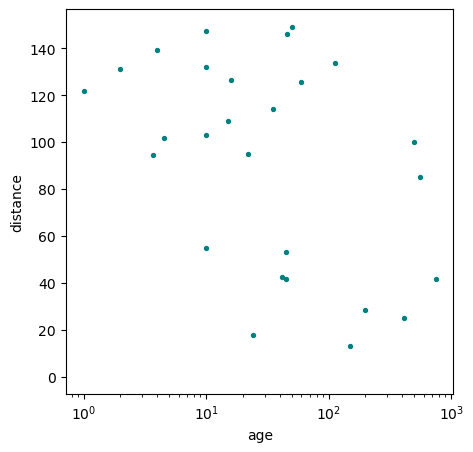

In [11]:
# display locations
plt.figure(figsize=(5,5))

plt.xlabel('age')
plt.ylabel('distance')

plt.xscale('log')

plt.scatter(0,0,color='firebrick')
plt.scatter(data['age'], data['distance'], color = 'teal', s=8)

plt.show()

### Ejection Velocities

In [12]:
# get required eject vel
reqVel = [((data['distance'][i]*u.pc) / (data['age'][i]*u.Myr)).to(u.km/u.second) for i in range(data['name'].size)]

In [13]:
data['reqVel'] = [round(reqVel.value,3) * u.km/u.second for reqVel in reqVel]

In [14]:
for i in range(data['name'].size):
    print(f"{data['name'][i]} \t {round(data['reqVel'][i].value,3)}")

118TAU 	 10.06
ABDMG 	 0.084
betaPMG 	 0.715
CAR 	 1.157
CARN 	 0.139
CBER 	 0.148
COL 	 0.988
CRA 	 33.998
EPSC 	 22.091
ETAC 	 25.02
HYA 	 0.054
IC2391 	 2.918
IC2602 	 3.105
LCC 	 7.098
OCT 	 3.182
PL8 	 2.049
PLE 	 1.168
ROPH 	 64.152
TAU 	 119.192
THA 	 0.905
THOR 	 4.227
TWA 	 5.354
UCL 	 7.722
UCRA 	 14.414
UMA 	 0.059
USCO 	 12.887
XFOR 	 0.195


In [15]:
#display those with reasonable ejection velocities
cutoff = 2 * u.km / u.s
data["viable"] = [val < (cutoff) for val in data["reqVel"]]
data[data["viable"] == True]

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55,age,distance,N,reqVel,viable
1,ABDMG,-6.0,-7.2,-8.8,-7.20,-27.60,-14.20,21.4,20.3,16.3,1.40,1.00,1.80,149.0,12.856127,48,0.084 km / s,True
2,betaPMG,4.1,-6.7,-15.7,-10.90,-16.00,-9.00,29.3,14.0,9.0,2.20,1.20,1.00,24.0,17.555341,42,0.715 km / s,True
3,CAR,6.7,-50.5,-15.5,-10.66,-21.92,-5.48,10.0,18.1,12.6,0.67,1.02,1.01,45.0,53.248380,7,1.157 km / s,True
4,CARN,0.7,-28.1,-4.3,-25.30,-18.10,-2.30,7.8,20.8,17.3,3.20,1.90,2.00,200.0,28.435717,13,0.139 km / s,True
5,CBER,-6.0,-5.1,84.9,-2.30,-5.51,-0.61,3.3,3.3,4.5,0.53,0.44,0.71,562.0,85.264412,40,0.148 km / s,True
6,COL,-25.9,-25.9,-21.4,-11.90,-21.28,-5.66,12.1,23.0,17.8,1.04,1.29,0.75,42.0,42.421457,23,0.988 km / s,True
10,HYA,-38.5,0.8,-15.8,-42.27,-18.79,-1.47,7.4,4.4,2.9,2.01,0.94,1.10,750.0,41.623671,177,0.054 km / s,True
16,PLE,-118.9,28.5,-54.4,-6.70,-28.00,-14.00,7.7,3.5,4.2,1.70,1.80,1.20,112.0,133.823839,190,1.168 km / s,True
19,THA,5.4,-20.1,-36.1,-9.79,-20.94,-0.99,19.4,12.4,3.8,0.87,0.79,0.72,45.0,41.669893,39,0.905 km / s,True
24,UMA,-7.5,9.9,21.9,14.80,1.80,-10.20,3.1,1.5,1.1,1.00,1.20,2.60,414.0,25.176775,9,0.059 km / s,True


In [16]:
#sort data by ejection velocity
data = data.sort_values('reqVel')
data

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55,age,distance,N,reqVel,viable
10,HYA,-38.50,0.80,-15.80,-42.27,-18.79,-1.47,7.40,4.40,2.90,2.01,0.94,1.10,750.0,41.623671,177,0.054 km / s,True
24,UMA,-7.50,9.90,21.90,14.80,1.80,-10.20,3.10,1.50,1.10,1.00,1.20,2.60,414.0,25.176775,9,0.059 km / s,True
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,1.40,1.00,1.80,149.0,12.856127,48,0.084 km / s,True
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,3.20,1.90,2.00,200.0,28.435717,13,0.139 km / s,True
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,0.53,0.44,0.71,562.0,85.264412,40,0.148 km / s,True
26,XFOR,-27.10,-46.30,-84.20,-12.54,-22.24,-6.26,4.70,3.80,4.40,0.96,1.41,2.21,500.0,99.838570,11,0.195 km / s,True
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,2.20,1.20,1.00,24.0,17.555341,42,0.715 km / s,True
19,THA,5.40,-20.10,-36.10,-9.79,-20.94,-0.99,19.40,12.40,3.80,0.87,0.79,0.72,45.0,41.669893,39,0.905 km / s,True
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,1.04,1.29,0.75,42.0,42.421457,23,0.988 km / s,True
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,0.67,1.02,1.01,45.0,53.248380,7,1.157 km / s,True


In [24]:
# create latex table
latex_data = data.loc[:,['name','N','distance','age','reqVel']]
latex_data['reqVel'] = [vel.value for vel in latex_data['reqVel']]

print(latex_data.to_latex())

# to copy latex to clipboard, uncomment this line
pyperclip.copy(latex_data.to_latex())

\begin{tabular}{llrrrr}
\toprule
 & name & N & distance & age & reqVel \\
\midrule
10 & HYA & 177 & 41.623671 & 750.000000 & 0.054000 \\
24 & UMA & 9 & 25.176775 & 414.000000 & 0.059000 \\
1 & ABDMG & 48 & 12.856127 & 149.000000 & 0.084000 \\
4 & CARN & 13 & 28.435717 & 200.000000 & 0.139000 \\
5 & CBER & 40 & 85.264412 & 562.000000 & 0.148000 \\
26 & XFOR & 11 & 99.838570 & 500.000000 & 0.195000 \\
2 & betaPMG & 42 & 17.555341 & 24.000000 & 0.715000 \\
19 & THA & 39 & 41.669893 & 45.000000 & 0.905000 \\
6 & COL & 23 & 42.421457 & 42.000000 & 0.988000 \\
3 & CAR & 7 & 53.248380 & 45.000000 & 1.157000 \\
16 & PLE & 190 & 133.823839 & 112.000000 & 1.168000 \\
15 & PL8 & 11 & 125.721199 & 60.000000 & 2.049000 \\
11 & IC2391 & 16 & 149.201944 & 50.000000 & 2.918000 \\
12 & IC2602 & 17 & 146.079704 & 46.000000 & 3.105000 \\
14 & OCT & 14 & 113.884591 & 35.000000 & 3.182000 \\
20 & THOR & 35 & 95.111829 & 22.000000 & 4.227000 \\
21 & TWA & 23 & 54.753447 & 10.000000 & 5.354000 \\
13 & LCC & 